# Simple MNIST NN from scratch

In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

Here's a video I made explaining all the math and showing my progress as I coded the network: https://youtu.be/w8yWXqWQYmU

In [25]:
path = 'digit-recognizer/train.csv'

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv(path)

In [27]:
data = np.array(data)
m, n = data.shape
# np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [28]:
Y_train

array([1, 5, 1, ..., 7, 6, 9])

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [29]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    res2 = sum(np.exp(Z))
    A = np.exp(Z) / res2
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1) 
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1n = W1 - alpha * dW1
    b1n = b1 - alpha * db1    
    W2n = W2 - alpha * dW2  
    b2n = b2 - alpha * db2    
    return W1n, b1n, W2n, b2n

In [30]:
wp=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
xp = np.array([[1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9]])

wp.dot(xp)

array([[ 10,  20,  30,  40,  50,  60,  70,  80,  90],
       [ 26,  52,  78, 104, 130, 156, 182, 208, 234],
       [ 42,  84, 126, 168, 210, 252, 294, 336, 378]])

In [31]:
wp

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [32]:
xp

array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [33]:
np.array([[1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9]]).T

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8],
       [9, 9, 9, 9]])

In [34]:
np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [35]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [36]:
Y_train[34:38]

array([8, 2, 3, 5])

In [37]:
def a() -> tuple[str, int]:

    return "hello",24



print(a())


print(type(init_params()[0]))
print(type(init_params()[1]))
print(init_params())

('hello', 24)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(array([[-0.17715804, -0.22148063,  0.08854561, ..., -0.36074293,
        -0.47565777, -0.05529431],
       [-0.15865529, -0.39164037, -0.09889734, ...,  0.45772737,
         0.34834944,  0.35960573],
       [-0.33361779, -0.04526535, -0.16390942, ...,  0.25234686,
        -0.22599092,  0.03360233],
       ...,
       [ 0.3050287 ,  0.09176153, -0.35335506, ..., -0.13876366,
         0.29352598,  0.11802381],
       [-0.35484435, -0.11067   , -0.10404043, ...,  0.26397058,
         0.40353327,  0.29838699],
       [-0.04422675, -0.23172722, -0.23232606, ...,  0.27572503,
         0.49876902,  0.42319289]]), array([[-0.35019821],
       [ 0.45901006],
       [-0.05924877],
       [-0.36391337],
       [-0.40042924],
       [ 0.0314168 ],
       [ 0.01356551],
       [-0.22513812],
       [-0.17515729],
       [-0.23368318]]), array([[-0.20155344, -0.28894781, -0.00884896,  0.30717434, -0.00727558,
        -0.16362149,  0.0778

In [38]:
np.random.rand(3, 2) - 0.5

array([[ 0.40239192, -0.43550881],
       [ 0.48681603,  0.16505921],
       [ 0.22489536, -0.27534859]])

In [40]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 0 0 ... 8 1 4] [1 5 1 ... 7 6 9]
0.1155609756097561
Iteration:  10
[1 0 1 ... 8 1 4] [1 5 1 ... 7 6 9]
0.21617073170731707
Iteration:  20
[1 0 1 ... 0 1 4] [1 5 1 ... 7 6 9]
0.27495121951219514
Iteration:  30
[1 0 1 ... 0 1 4] [1 5 1 ... 7 6 9]
0.31009756097560975
Iteration:  40
[1 8 1 ... 7 1 4] [1 5 1 ... 7 6 9]
0.3474634146341463
Iteration:  50
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.3789268292682927
Iteration:  60
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.4155121951219512
Iteration:  70
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.44546341463414635
Iteration:  80
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.4703414634146341
Iteration:  90
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.49617073170731707
Iteration:  100
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.5208048780487805
Iteration:  110
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.5465121951219513
Iteration:  120
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.5704878048780487
Iteration:  130
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.5919024390243902
Iteration:  

~85% accuracy on training set.

In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


# def forward_prop(W1, b1, W2, b2, X):
#     Z1 = W1.dot(X) + b1
#     A1 = ReLU(Z1) 
#     Z2 = W2.dot(A1) + b2
#     A2 = softmax(Z2)
#     return Z1, A1, Z2, A2

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [17]:
print(W1.shape, b1.shape, W2.shape, b2.shape)

(10, 784) (10, 1) (10, 10) (10, 1)


Let's look at a couple of examples:

Prediction:  [1]
Label:  1


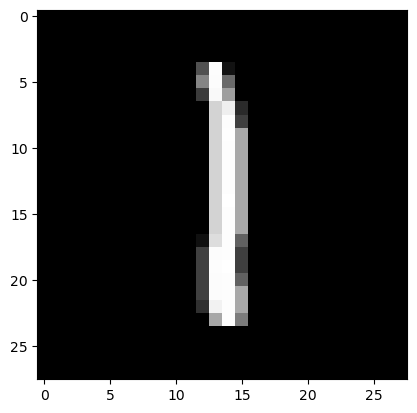

Prediction:  [4]
Label:  5


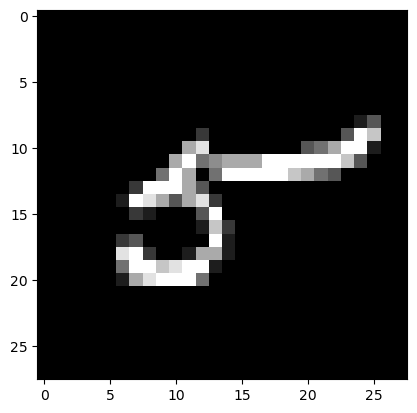

Prediction:  [1]
Label:  1


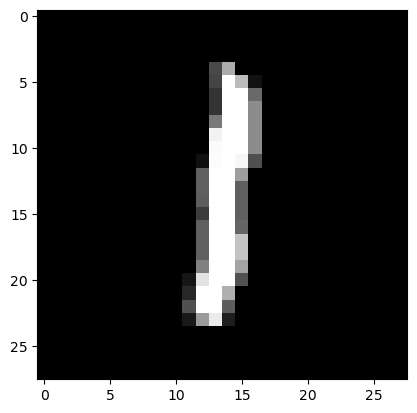

Prediction:  [7]
Label:  7


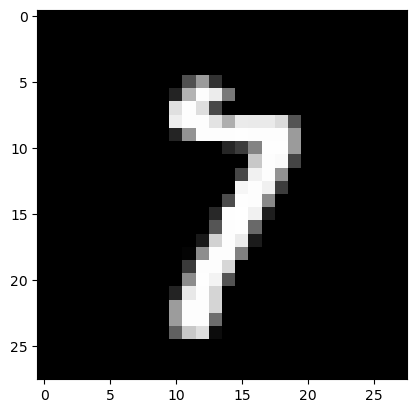

In [18]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [19]:

b1

array([[1.18374978],
       [1.27605178],
       [0.49939252],
       [1.41936579],
       [1.41900547],
       [1.44848988],
       [0.90647326],
       [0.569988  ],
       [1.4100646 ],
       [1.20564428]])

Finally, let's find the accuracy on the dev set:

In [20]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 0 1 2 0 0 7 9 5 3 8 9 1 3 3 1 8 0 7 6 8 6 2 0 2 3 6 9 9 7 8 9 4 9 6 1 3
 1 1 4 3 1 4 9 2 6 5 7 7 4 7 5 1 9 0 1 2 3 4 1 1 8 9 0 6 3 4 4 1 0 3 9 6 2
 1 4 7 1 4 1 5 4 8 9 2 5 9 5 9 4 3 6 4 6 9 7 1 2 0 5 9 2 9 7 8 8 8 5 0 6 0
 0 2 9 0 9 7 7 1 5 7 9 4 4 1 6 7 6 5 0 4 7 2 8 1 1 7 3 7 2 1 0 3 4 5 4 0 8
 4 5 3 5 1 0 8 3 7 0 9 6 6 9 8 9 1 9 8 3 4 2 4 8 7 9 5 8 8 8 3 6 9 3 1 0 4
 1 5 9 0 6 2 4 9 0 6 0 0 8 3 2 0 0 6 0 0 4 7 3 7 1 9 3 3 9 8 7 1 5 1 3 8 1
 8 7 1 3 7 6 3 6 3 6 3 2 3 6 2 9 9 2 2 2 7 3 4 8 9 2 0 1 4 9 6 3 9 1 1 1 4
 7 0 2 9 2 0 5 6 0 8 9 6 2 0 0 7 2 0 4 2 0 9 1 6 9 3 0 0 2 0 6 8 4 0 7 2 1
 9 5 2 4 8 5 2 9 7 9 2 4 9 4 9 3 6 9 3 6 3 6 8 8 3 7 0 9 2 7 9 0 5 4 5 8 4
 3 3 1 7 8 9 7 6 2 1 7 0 5 6 5 3 9 0 4 6 6 2 2 9 0 7 7 1 2 6 3 4 8 0 5 9 6
 2 1 9 0 6 0 4 3 4 3 1 5 4 2 9 5 7 3 1 5 4 5 3 7 3 8 6 4 4 6 1 1 4 0 0 5 8
 6 7 4 2 8 0 2 5 4 8 3 0 4 4 8 6 4 1 8 1 5 4 7 4 3 2 0 6 0 7 9 2 9 2 9 6 4
 2 4 4 6 4 8 4 1 7 3 8 4 5 9 9 7 5 8 2 2 2 2 8 9 1 9 3 6 0 2 2 9 1 2 7 2 1
 3 4 9 1 8 0 2 2 3 4 1 3 

0.841

Still 84% accuracy, so our model generalized from the training data pretty well.